In [ ]:
! pip install scikit-learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
plt.style.use('bmh')
%matplotlib inline
!pip install scipy

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving GOOG.csv to GOOG (1).csv


In [ ]:
df=pd.read_csv('GOOG.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,7/22/2019,1133.449951,1139.250000,1124.239990,1138.069946,1138.069946,1301500
1,7/23/2019,1144.000000,1146.900024,1131.800049,1146.209961,1146.209961,1093700
2,7/24/2019,1131.900024,1144.000000,1126.989990,1137.810059,1137.810059,1589800
3,7/25/2019,1137.819946,1141.699951,1120.920044,1132.119995,1132.119995,2209800
4,7/26/2019,1224.040039,1265.550049,1224.000000,1250.410034,1250.410034,4805800
5,7/29/2019,1241.050049,1247.369995,1228.229980,1239.410034,1239.410034,2223700


In [ ]:
df.shape

(254, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj_Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


<function matplotlib.pyplot.show>

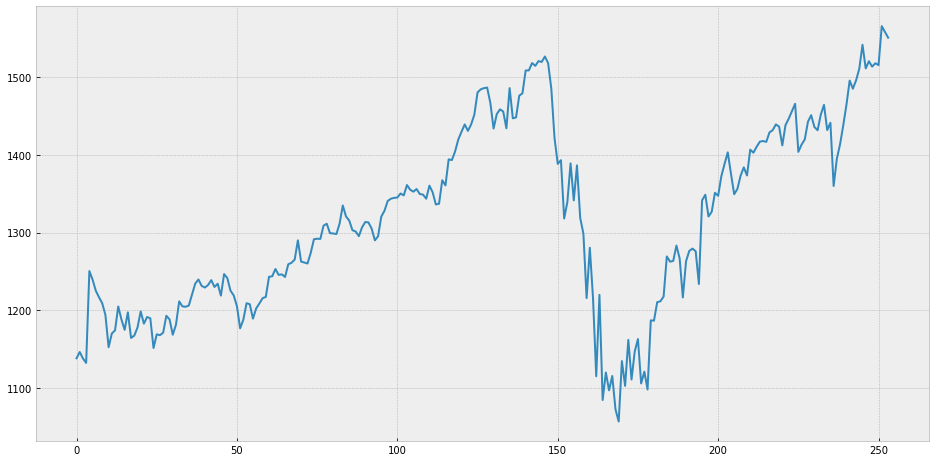

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.show

In [ ]:
df=df[['Close']]
df.head(6)


,Close
0,1138.069946
1,1146.209961
2,1137.810059
3,1132.119995
4,1250.410034
5,1239.410034


In [ ]:
future_days=25
df['Predictions']=df[['Close']].shift(-future_days)
df

,Close,Predictions
0,1138.069946,1168.890015
1,1146.209961,1167.839966
2,1137.810059,1171.020020
3,1132.119995,1192.849976
4,1250.410034,1188.099976
...,...,...
249,1518.000000,NaN
250,1515.550049,NaN
251,1565.719971,NaN
252,1558.420044,NaN


In [ ]:
X=np.array(df.drop(['Predictions'],(1)))[:-future_days]
print(X)

[[1138.069946]
 [1146.209961]
 [1137.810059]
 [1132.119995]
 [1250.410034]
 [1239.410034]
 [1225.140015]
 [1216.680054]
 [1209.01001 ]
 [1193.98999 ]
 [1152.319946]
 [1169.949951]
 [1173.98999 ]
 [1204.800049]
 [1188.01001 ]
 [1174.709961]
 [1197.27002 ]
 [1164.290039]
 [1167.26001 ]
 [1177.599976]
 [1198.449951]
 [1182.689941]
 [1191.25    ]
 [1189.530029]
 [1151.290039]
 [1168.890015]
 [1167.839966]
 [1171.02002 ]
 [1192.849976]
 [1188.099976]
 [1168.390015]
 [1181.410034]
 [1211.380005]
 [1204.930054]
 [1204.410034]
 [1206.      ]
 [1220.170044]
 [1234.25    ]
 [1239.560059]
 [1231.300049]
 [1229.150024]
 [1232.410034]
 [1238.709961]
 [1229.930054]
 [1234.030029]
 [1218.76001 ]
 [1246.52002 ]
 [1241.390015]
 [1225.089966]
 [1219.      ]
 [1205.099976]
 [1176.630005]
 [1187.829956]
 [1209.      ]
 [1207.680054]
 [1189.130005]
 [1202.310059]
 [1208.670044]
 [1215.449951]
 [1217.140015]
 [1243.01001 ]
 [1243.640015]
 [1253.069946]
 [1245.48999 ]
 [1246.150024]
 [1242.800049]
 [1259.130

In [ ]:
y=np.array(df['Predictions'])[:-future_days]
print(y)

[1168.890015 1167.839966 1171.02002  1192.849976 1188.099976 1168.390015
 1181.410034 1211.380005 1204.930054 1204.410034 1206.       1220.170044
 1234.25     1239.560059 1231.300049 1229.150024 1232.410034 1238.709961
 1229.930054 1234.030029 1218.76001  1246.52002  1241.390015 1225.089966
 1219.       1205.099976 1176.630005 1187.829956 1209.       1207.680054
 1189.130005 1202.310059 1208.670044 1215.449951 1217.140015 1243.01001
 1243.640015 1253.069946 1245.48999  1246.150024 1242.800049 1259.130005
 1260.98999  1265.130005 1290.       1262.619995 1261.290039 1260.109985
 1273.73999  1291.369995 1292.030029 1291.800049 1308.859985 1311.369995
 1299.189941 1298.800049 1298.       1311.459961 1334.869995 1320.699951
 1315.459961 1303.050049 1301.349976 1295.339966 1306.689941 1313.550049
 1312.98999  1304.959961 1289.920044 1295.280029 1320.540039 1328.130005
 1340.619995 1343.560059 1344.660034 1345.02002  1350.27002  1347.829956
 1361.170044 1355.119995 1352.619995 1356.040039 134

In [ ]:
##Split the dat for Training and Testing###

x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.25)

In [ ]:
##Create the model##
tree=DecisionTreeRegressor().fit(x_train,y_train)

In [ ]:
x_future=(df.drop(['Predictions'],(1)))[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[1375.73999 ],
       [1349.329956],
       [1356.130005],
       [1373.189941],
       [1383.939941],
       [1373.484985],
       [1406.719971],
       [1402.800049],
       [1410.420044],
       [1417.02002 ],
       [1417.839966],
       [1416.72998 ],
       [1428.920044],
       [1431.819946],
       [1439.219971],
       [1436.380005],
       [1412.180054],
       [1438.390015],
       [1446.609985],
       [1456.160034],
       [1465.849976],
       [1403.839966],
       [1413.180054],
       [1419.849976],
       [1442.719971]])

In [ ]:
tree_predicton=tree.predict(x_future)
print(tree_predicton)

[1451.119995 1435.959961 1431.719971 1451.859985 1419.849976 1451.859985
 1441.329956 1359.900024 1565.719971 1413.609985 1438.040039 1464.699951
 1495.699951 1485.180054 1526.689941 1215.560059 1565.719971 1526.689941
 1520.579956 1513.640015 1389.109985 1515.550049 1565.719971 1558.420044
 1526.689941]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


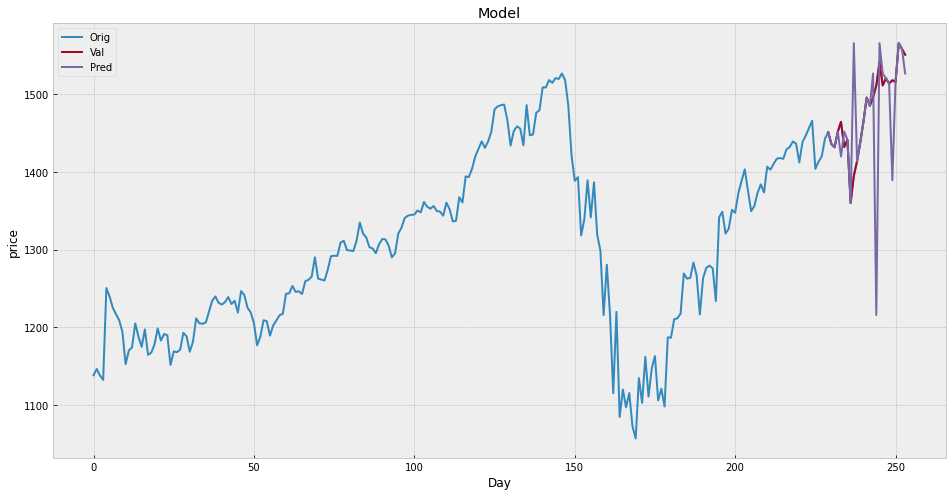

In [ ]:
prediction=tree_predicton

valid=df[X.shape[0]:]
valid['Predictions']=prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Day')
plt.ylabel('price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()